In [1]:
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.stats import linregress

from bamf.jaxCR import *

import time

np.random.seed(123)

# set plot parameters
params = {'legend.fontsize': 18,
          'figure.figsize': (8, 7),
          'axes.labelsize': 24,
          'axes.titlesize':24,
          'axes.linewidth':3,
          'xtick.labelsize':20,
          'ytick.labelsize':20}
plt.rcParams.update(params)
plt.style.use('seaborn-colorblind')
plt.rcParams['pdf.fonttype'] = 42

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-g9o4885w because the default path (/home/jaron/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


# Import data

In [2]:
# used later for model validation
# gLV_data = pd.read_csv("gLV_data/DSM_processed_mono.csv")
gLV_data = pd.read_csv("gLV_data/gLV_data_for_CR.csv")
gLV_data

,Treatments,Time,s1,s2,s3,s4
0,mono_exp_1,0.0,0.000000,0.000000,0.000000,0.100000
1,mono_exp_1,8.0,0.000000,0.000000,0.000000,0.239208
2,mono_exp_1,16.0,0.000000,0.000000,0.000000,0.195858
3,mono_exp_2,0.0,0.000000,0.000000,0.100000,0.000000
4,mono_exp_2,8.0,0.000000,0.000000,0.344997,0.000000
5,mono_exp_2,16.0,0.000000,0.000000,0.382547,0.000000
6,exp_3,0.0,0.000000,0.000000,0.100000,0.100000
7,exp_3,8.0,0.000000,0.000000,0.363301,0.159827
8,exp_3,16.0,0.000000,0.000000,0.384865,0.160930
9,mono_exp_4,0.0,0.000000,0.100000,0.000000,0.000000


In [3]:
# get species names
species = gLV_data.columns.values[2:]
species

array(['s1', 's2', 's3', 's4'], dtype=object)

# Fit model 

In [4]:
model = CRNN(gLV_data, species, n_r=2, n_h=4, verbose=True)

model.fit(evidence_tol=1e-2, patience=1, max_fails=1)

Total samples: 30, Updated regularization: 1.00e-05
Total weighted fitting error: 10.868
Total weighted fitting error: 2.469
Total weighted fitting error: 1.937
Total weighted fitting error: 1.752
Total weighted fitting error: 1.630
Total weighted fitting error: 1.522
Total weighted fitting error: 1.339
Total weighted fitting error: 1.311
Total weighted fitting error: 1.098
Total weighted fitting error: 1.089
Total weighted fitting error: 1.014
Total weighted fitting error: 1.002
Total weighted fitting error: 0.979
Total weighted fitting error: 0.937
Total weighted fitting error: 0.881
Total weighted fitting error: 0.868
Total weighted fitting error: 0.851
Total weighted fitting error: 0.819
Total weighted fitting error: 0.769
Total weighted fitting error: 0.768
Total weighted fitting error: 0.710
Total weighted fitting error: 0.694
Total weighted fitting error: 0.602
Total weighted fitting error: 0.594
Total weighted fitting error: 0.579
Total weighted fitting error: 0.551
Total weigh

In [5]:
def plot(model, df_test):
    all_treatments = df_test.Treatments.values
    unique_treatments = np.unique(all_treatments)
    numspecies = len(species)
    
    # save true values and predictions
    true = []
    pred = []
    spcs = []

    # pull a random community trajectory
    for treatment in unique_treatments:
        comm_inds = np.in1d(df_test['Treatments'].values, treatment)
        comm_data = df_test.iloc[comm_inds].copy()

        # make sure comm_data is sorted in chronological order
        comm_data.sort_values(by='Time', ascending=True, inplace=True)
        tspan = comm_data.Time.values

        # pull just the community data
        output_true = comm_data[species].values

        # run model using parameters
        x_test = np.copy(output_true[0, :])
        
        # predict end-point measured values
        output,_,_ = model.predict(x_test, tspan)
        true.append(output_true[-1])
        pred.append(output[-1, :len(species)])
        spcs.append(species)

        # increase teval
        t_eval = np.linspace(0, tspan[-1]+.5)
        steps = len(t_eval)
        output,L,U = model.predict(x_test, t_eval)

        # plot the results
        plt.figure(figsize=(9, 6))
        ylim = 0
        for i, sp in enumerate(species):
            out = output[:,i]
            out_true = output_true[:, i]
            plt.scatter(tspan, out_true, color='C{}'.format(i))
            plt.plot(t_eval, out, label=f"Predicted {sp}", color='C{}'.format(i))
            plt.fill_between(t_eval, L[:, i], U[:, i], color='C{}'.format(i), alpha=0.2)
                
        plt.xlabel("Time (hr)")
        plt.ylabel("Species abundance")
        #plt.legend(loc='upper left')
        plt.title(f"{treatment}")
        # plt.savefig("figures/CRNN_mono_s.pdf")
        plt.show()
        
        # plot predictions of hidden variables
        for k in range(output.shape[-1] - (i+1)):
            plt.plot(t_eval, np.exp(output[:,i+1+k]), label=f"Predicted R{k+1}", color=f'C{k+1}')
            '''plt.fill_between(t_eval, 
                             np.exp(output[:,i+1+k] - stdv[:,i+1+k]), 
                             np.exp(output[:,i+1+k] + stdv[:,i+1+k]), 
                             color=f'C{k+1}', alpha=0.2)'''

        plt.legend()
        plt.ylabel("Resource concentration")
        plt.xlabel("Time (hr)")
        # plt.savefig("figures/CRNN_mono_r.pdf")
        plt.show()
        
    return np.concatenate(true), np.concatenate(pred), np.concatenate(spcs)

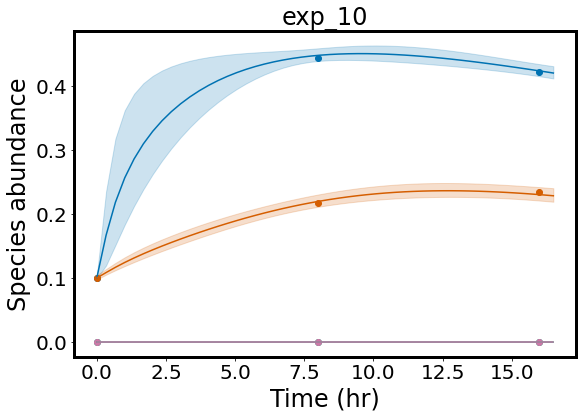

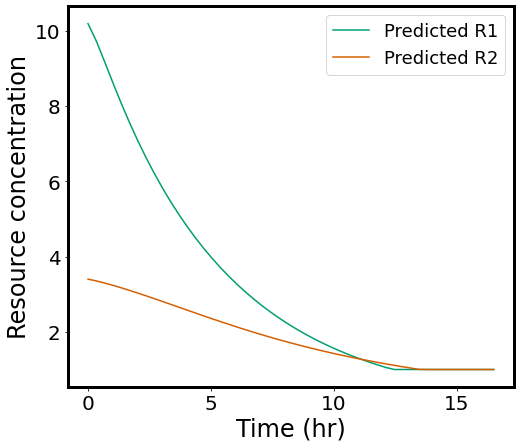

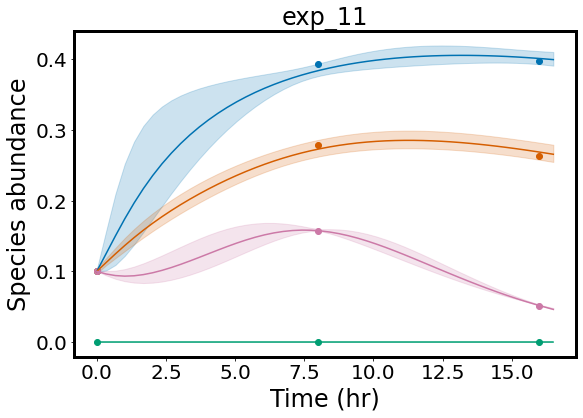

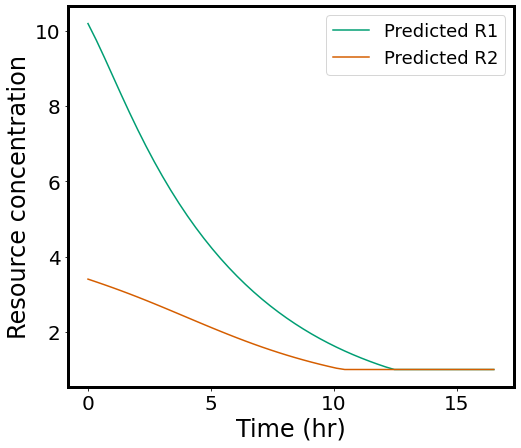

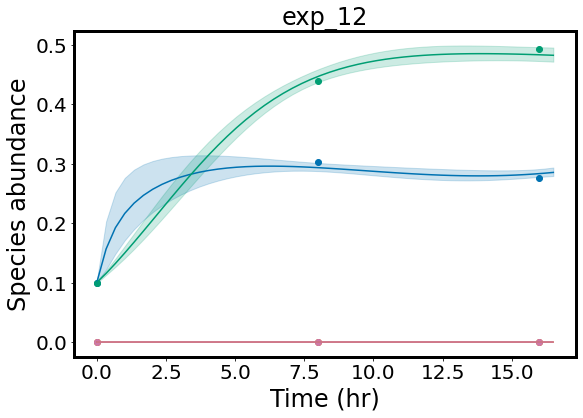

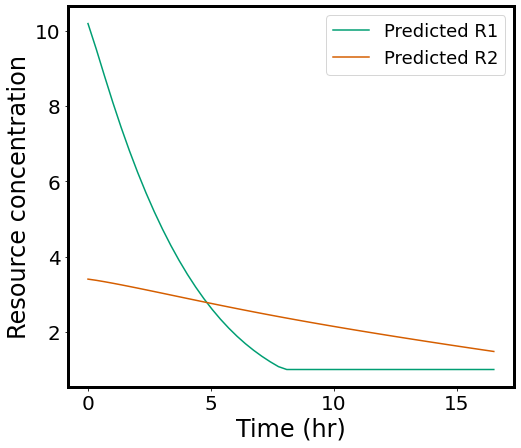

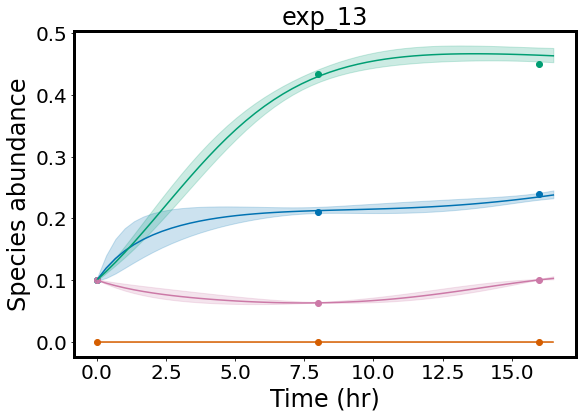

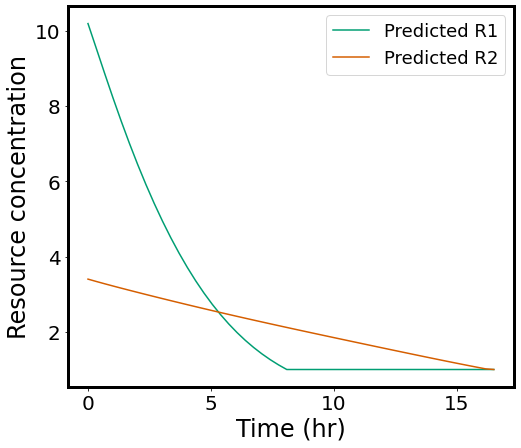

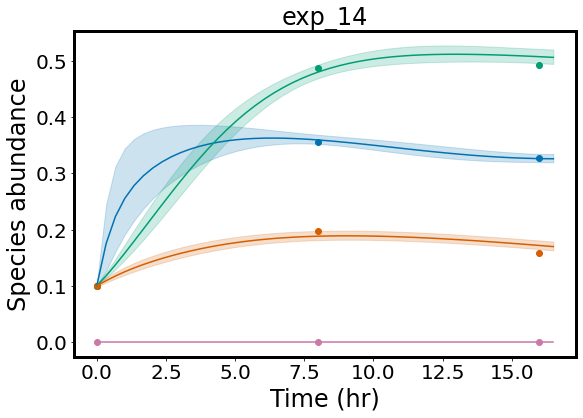

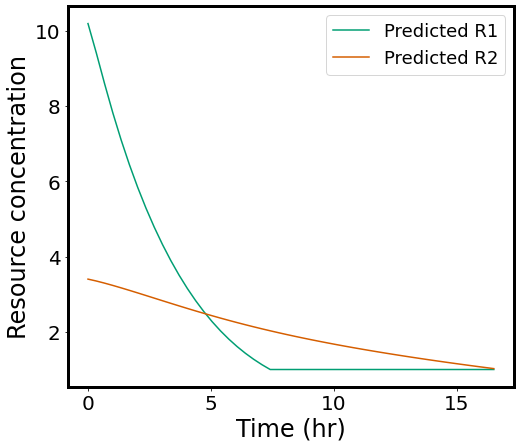

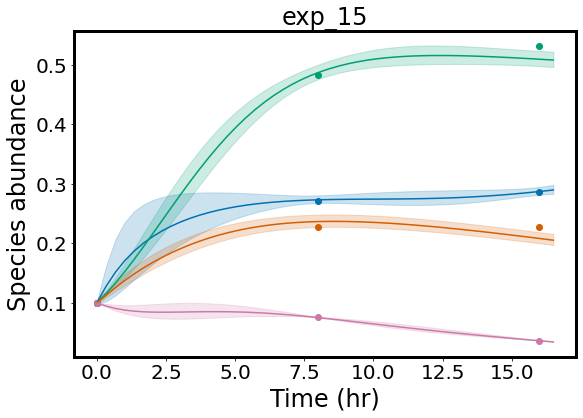

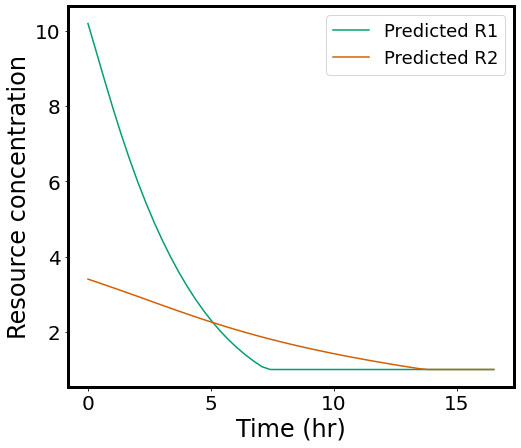

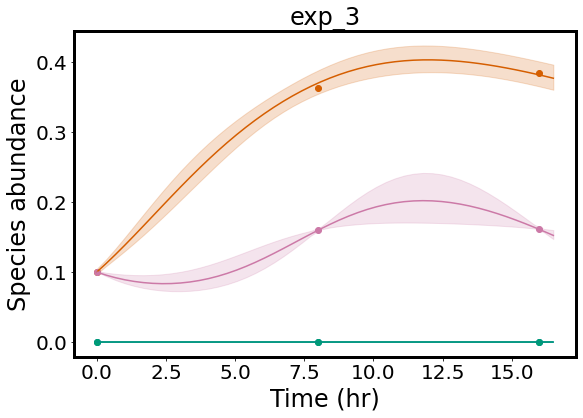

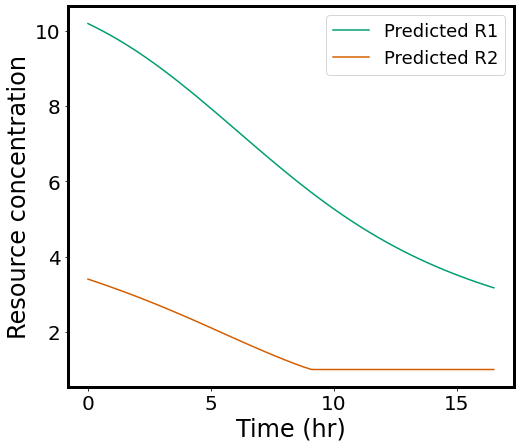

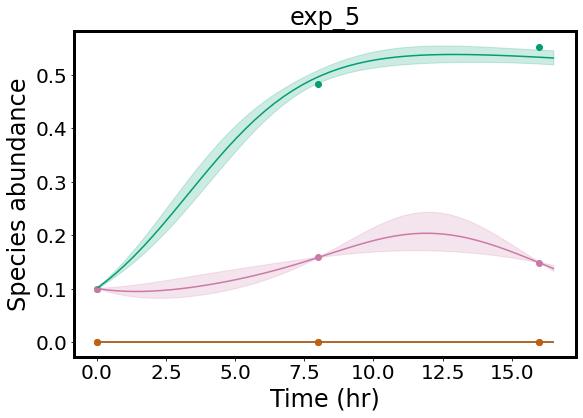

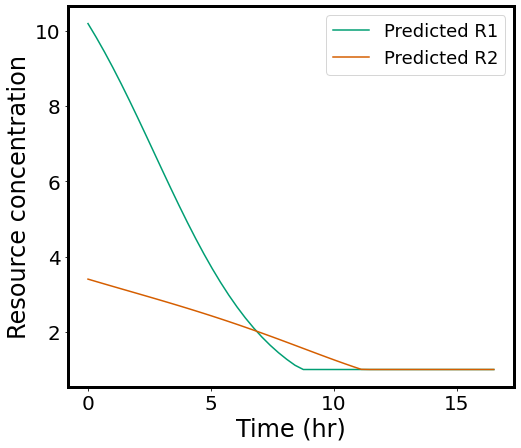

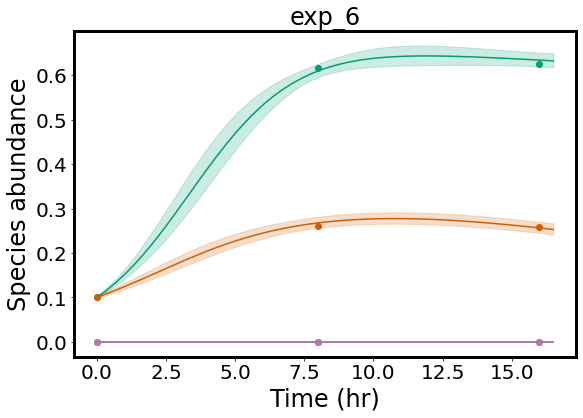

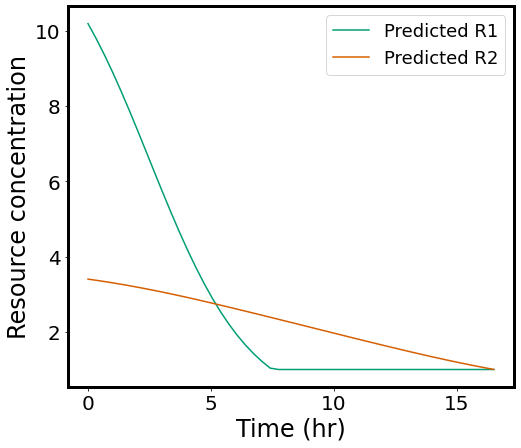

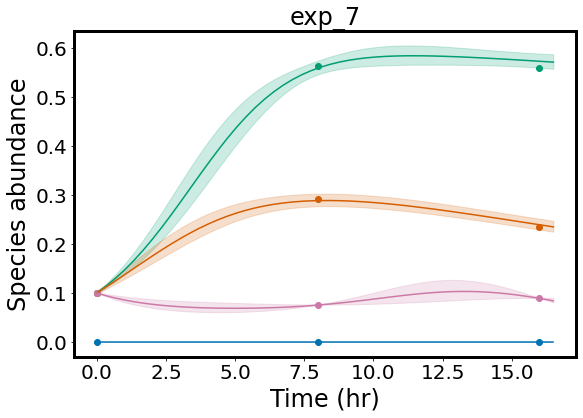

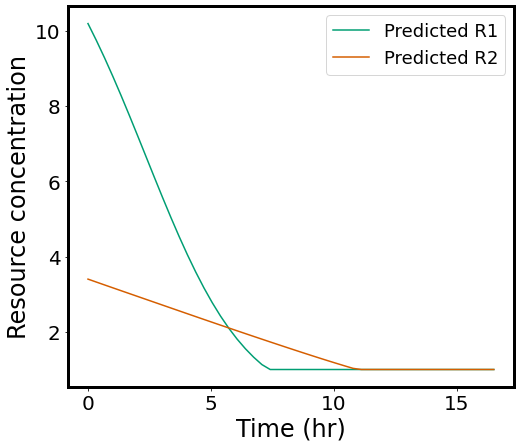

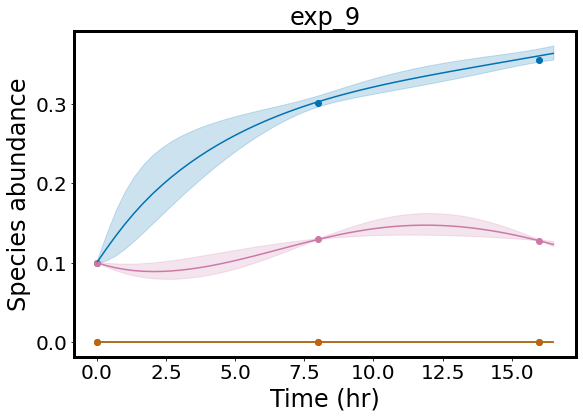

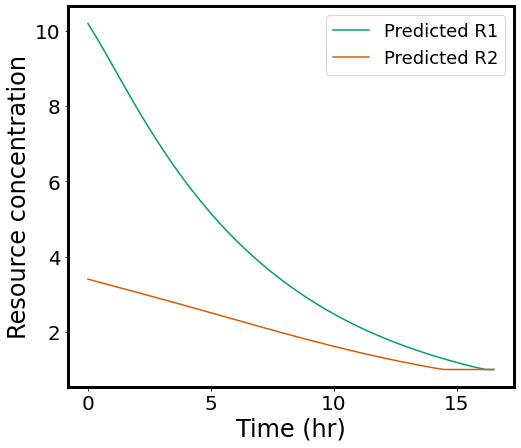

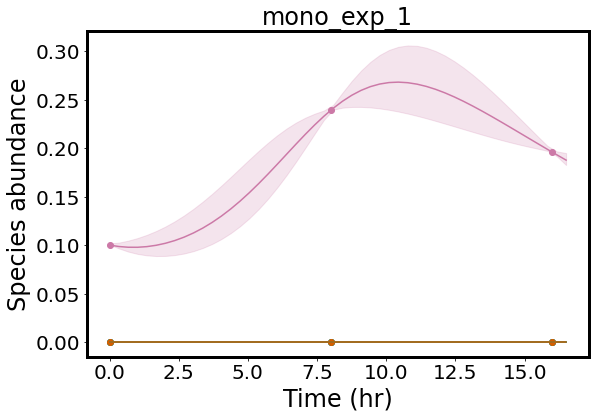

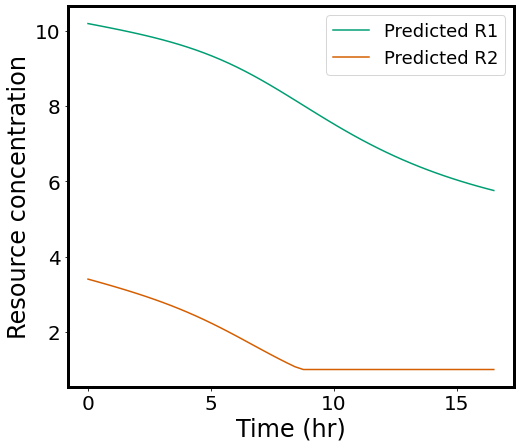

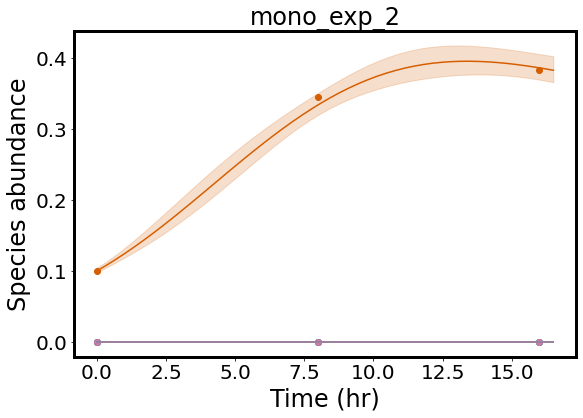

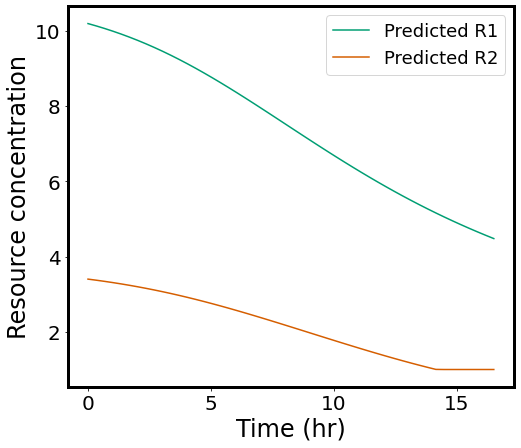

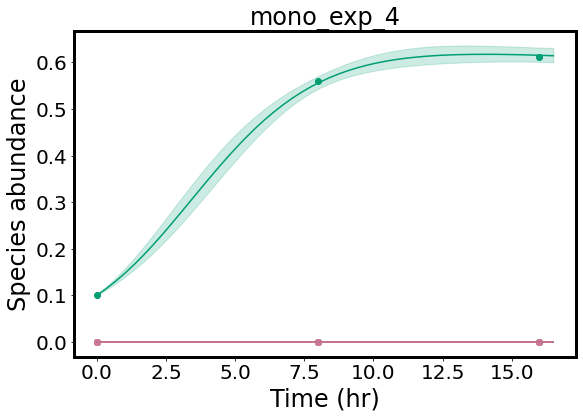

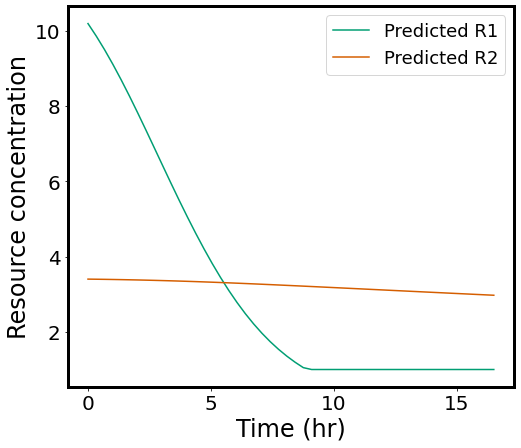

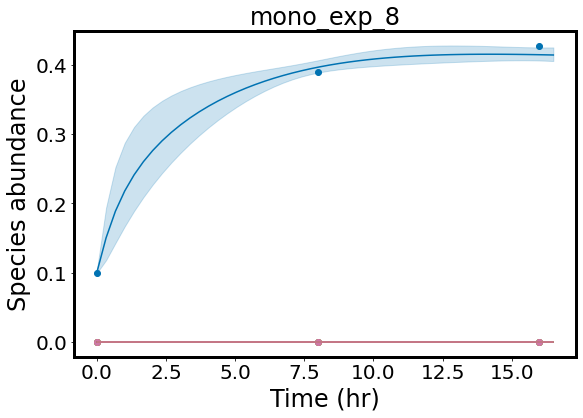

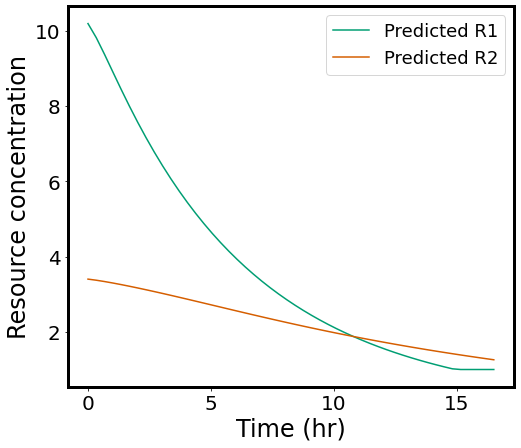

In [6]:
res = plot(model, gLV_data)

In [9]:
np.sqrt(1/np.diag(model.Beta))

array([0.01614822, 0.01639306, 0.03102979, 0.0055124 ], dtype=float32)